In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import ipysheet
import ipywidgets as wg

In [2]:
sheet = ipysheet.sheet(rows=4, columns=2)
col0 = ipysheet.column(0,["Width L [m]", "Height H [m]", "Temperature conductivity alpha [m^2/s]", "Step size"])
col1 = ipysheet.column(1,[0.5, 0.5, 117e-6, 80], numeric_format="0.00000")

sheet2 = ipysheet.sheet(rows=4, columns=2)
col00 = ipysheet.column(0,["T links", "T rechts", "T unten", "T oben"])
col01 = ipysheet.column(1,[18, 18, 120, 18], numeric_format="0.00")

sheet3 = ipysheet.sheet(rows=3, columns=2)
col10 = ipysheet.column(0,["Time [s]", "Time steps size [s]", "Initial temperature [°C]"])
col11 = ipysheet.column(1,[60, 0.01, 18], type="numeric")



# Simulation of the heat equation for a plate of width $L$ and Height $H$

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \nabla^2 T \qquad (1)
\end{equation}


The grid is meshed by a grid of rectangles of with $\frac{L}{n}$ and height $\frac{B}{n}$ where $n$ is the step size of the discretization.

The second derivative is approximated by means of finite differences:

\begin{equation}
\frac{\partial^2 y}{\partial x^2} = \frac{y_{i+1} - 2 \cdot y_i + y_{i+1}}{\Delta x^2} \qquad (2)
\end{equation}

In [3]:
def dxdt(x, TL, TR, TU, TO):
    dxdt = np.zeros_like(x)
    dydt = np.zeros_like(x)
    
    dydt[0] = (x[2] -2*x[1] + TU)/dx**2        
    dydt[1:-1] = (x[2:] -2*x[1:-1] + x[:-2])/dx**2
    dydt[-1] = (TO -2*x[-2] + x[-3])/dx**2
    
    dxdt[:,0] = (x[:,2] -2*x[:,1] + TL)/dy**2  
    dxdt[:,1:-1] = (x[:,2:] -2*x[:,1:-1] + x[:,:-2])/dy**2
    dxdt[:,-1] = (TR -2*x[:,-2] + x[:,-3])/dy**2
    
    return alpha*(dxdt + dydt)

def plot(time):
    fig2 = plt.figure(figsize=(12,8))
    plt.title("Time: " + "{:.2f}".format(time*dt) +" s")
    plt.xlabel("x-Koordinate")
    plt.ylabel("y-Koordinate")
    plt.pcolor(x, y, T_t[time], cmap="afmhot")
    plt.colorbar(label="Temperatur [°C]")
    #plt.clim(0, 400)

### The following two sheets can be filled with custom geometric Information, material constants as well as the step size. The temperature boudary conditions can be set as well.

In [4]:
sheet

Sheet(cells=(Cell(column_end=0, column_start=0, row_start=0, squeeze_row=False, type='text', value=['Width L […

In [5]:
sheet2

Sheet(cells=(Cell(column_end=0, column_start=0, row_start=0, squeeze_row=False, type='text', value=['T links',…

### By running the following cell, the steady state solution of the system is calculated, which means that all derivatives in respect to time have to equal zero. 
\begin{equation}
0 = \alpha \nabla^2 T \qquad (3)
\end{equation}


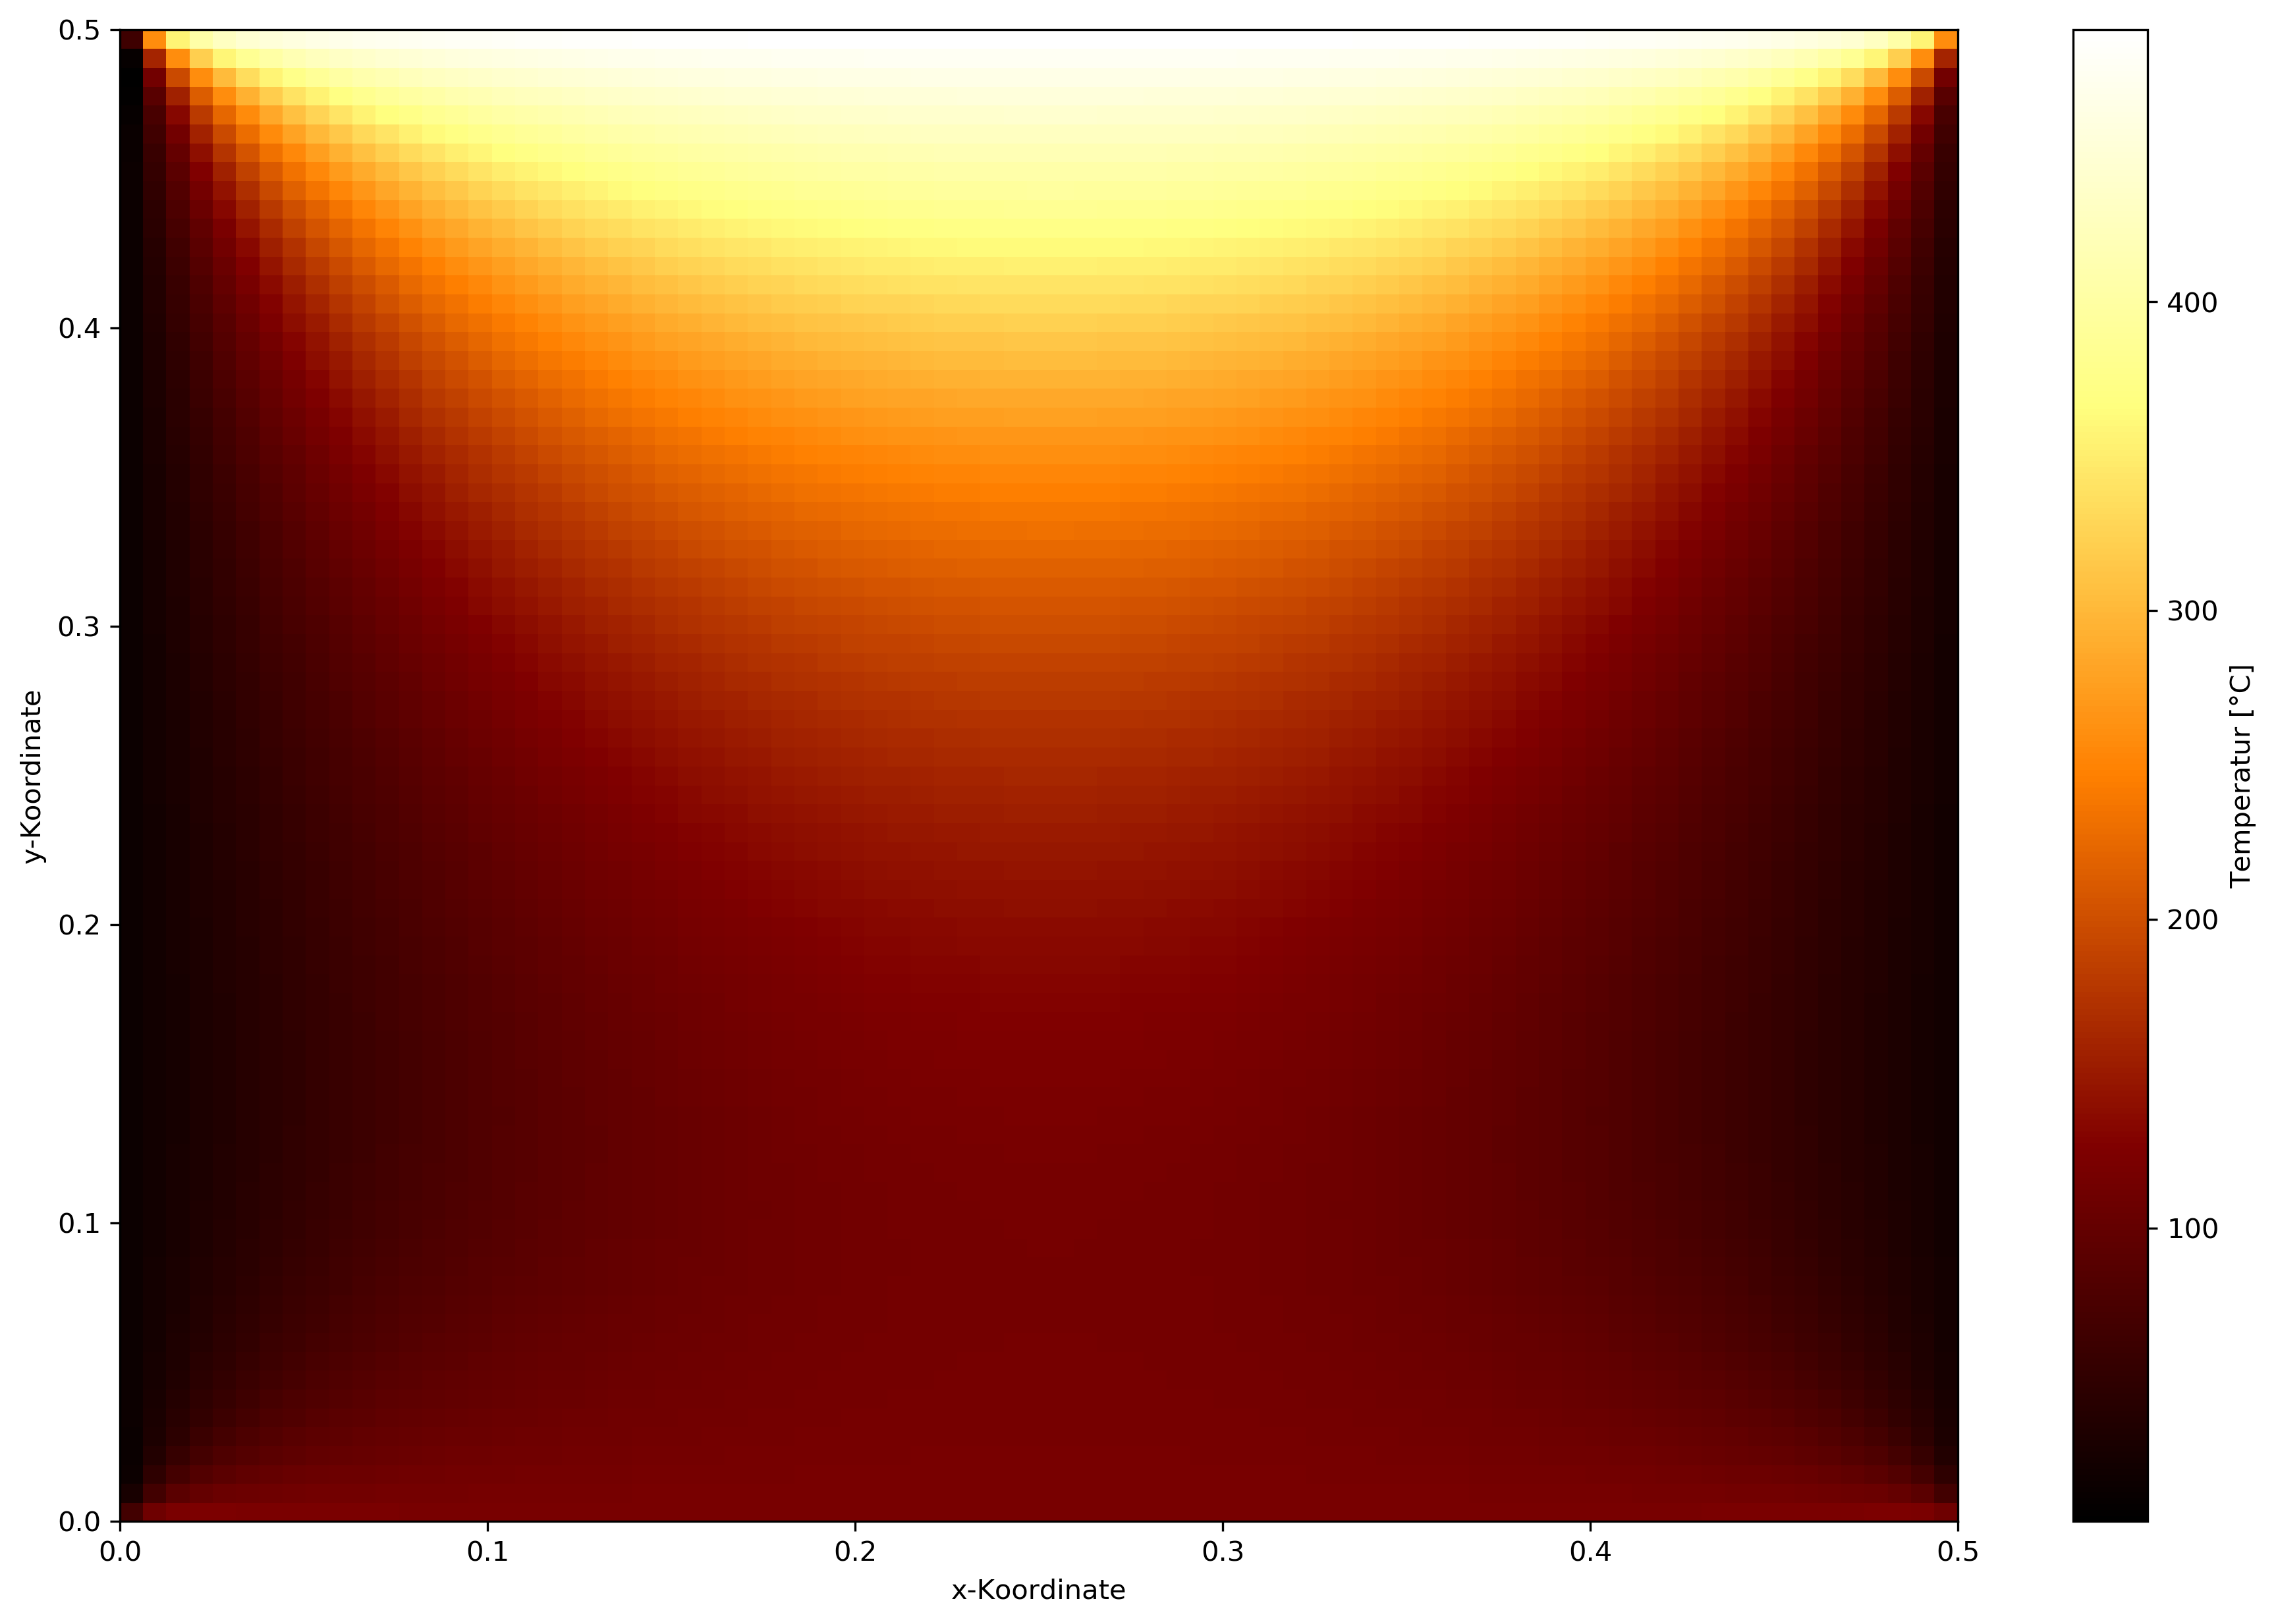

In [10]:
%matplotlib inline

L = col1.value[0]
H = col1.value[1]
alpha = col1.value[2]
n = int(col1.value[3])

dx = L/n
dy = H/n

x = np.linspace(0,L,n, dtype=float)
y = np.linspace(0,H,n,dtype=float)

guess = np.zeros((n, n), float)
sol = root(dxdt, guess, (*col01.value,), method='krylov', options={'disp': False})

fig = plt.figure(figsize=(15,10), dpi=300)
plt.xlabel("x-Koordinate")
plt.ylabel("y-Koordinate")
plt.pcolor(x, y, sol.x, cmap="afmhot")
plt.colorbar(label="Temperatur [°C]")

### This code below calculates the solution for every timepoint and an initial temperature of the plate. For $t \rightarrow \infty$ the dynamic solution should converge to the steady state calculated above.

\begin{equation}
T_{i+1} = T_i + \alpha \nabla^2 T \cdot dt \qquad (4)
\end{equation}

### Choose the desired time, time step size and initial temperature of the plate and run lines 126 and 127. Then hit play and watch the temperature of the plate update dynamically.

In [7]:
sheet3

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=2, row_start=0, squeeze_row=False, type='text', value=…

In [11]:
%matplotlib inline

T = np.ones((n,n), dtype=float)*col11.value[2]
t = col11.value[0]
dt = col11.value[1]
nt = int(t/dt)
T_t = list(range(nt))
T_t[0] = T
for i in range(nt-1):    
    T_t[i+1] = T_t[i] + dxdt(T_t[i], *col01.value)*dt

In [12]:
time = wg.Play(
    interval=1000, #Interval in ms
    value=0,
    min=0,
    max=len(T_t)-1,
    step=1/dt,
    description="Press play",
    disabled=False
)
wg.interact(plot, time = time)

interactive(children=(Play(value=0, description='Press play', interval=1000, max=5999, step=100), Output()), _…

<function __main__.plot(time)>